### Questions
1. EDA
2. Plot the data, visualize
3. Check stationary
4. Check autocorrelation
5. Execute the criterion
6. Compare the time series models for the given dataset (arma, arima, seasonal arima)
7. forecast data using best fit model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels

In [2]:
ls

 Volume in drive E is Student
 Volume Serial Number is 1ED5-06BE

 Directory of E:\Baari\Baari

17-04-2025  12:15    <DIR>          .
17-04-2025  11:38    <DIR>          ..
17-04-2025  11:38    <DIR>          .ipynb_checkpoints
17-04-2025  11:05         4,327,228 4_powerconsumption.csv
17-04-2025  12:15             7,242 cia2.ipynb
               2 File(s)      4,334,470 bytes
               3 Dir(s)  67,279,286,272 bytes free


In [3]:
df = pd.read_csv('4_powerconsumption.csv', index_col=0, parse_dates=True,usecols=['Datetime','PowerConsumption_Zone1'] )
df.head()

,PowerConsumption_Zone1
Datetime,
2017-01-01 00:00:00,34055.69620
2017-01-01 00:10:00,29814.68354
2017-01-01 00:20:00,29128.10127
2017-01-01 00:30:00,28228.86076
2017-01-01 00:40:00,27335.69620


<Axes: xlabel='Datetime'>

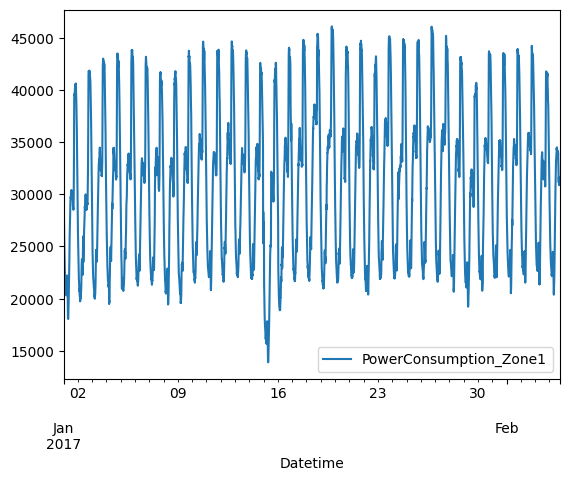

In [46]:
df.plot()

In [47]:
df.corr()

,PowerConsumption_Zone1
PowerConsumption_Zone1,1.0


In [4]:
df.shape

(52416, 1)

Since this PC throws memory error when model training with certain parameters, I'll reduce the data size

In [5]:
df=df.iloc[:5000]

In [6]:
df.shape

(5000, 1)

In [7]:
df.describe()

,PowerConsumption_Zone1
count,5000.000000
mean,30989.877889
std,7323.791015
min,13895.696200
25%,23996.955588
50%,31649.620250
75%,35664.760780
max,46092.151900


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5000 entries, 2017-01-01 00:00:00 to 2017-02-04 17:10:00
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PowerConsumption_Zone1  5000 non-null   float64
dtypes: float64(1)
memory usage: 78.1 KB


## Checking Stationarity

In [8]:
from statsmodels.tsa.stattools import adfuller

results = adfuller(df['PowerConsumption_Zone1'])
results

(-12.951977490298258,
 3.361485925270291e-24,
 15,
 4984,
 {'1%': -3.4316627349870146,
  '5%': -2.8621200865028813,
  '10%': -2.5670787808193283},
 74154.56982599293)

In [9]:
print(
    "ADF:", results[0],
    "\nP Value:", results[1]
)
if results[1] <= 0.05:
    print("The data is stationary")
else:
    print("The data is not stationary")

ADF: -12.951977490298258 
P Value: 3.361485925270291e-24
The data is stationary


### Checking AutoCorrelation

[]

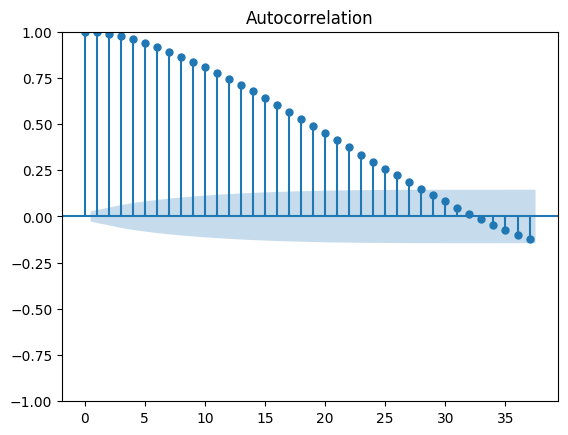

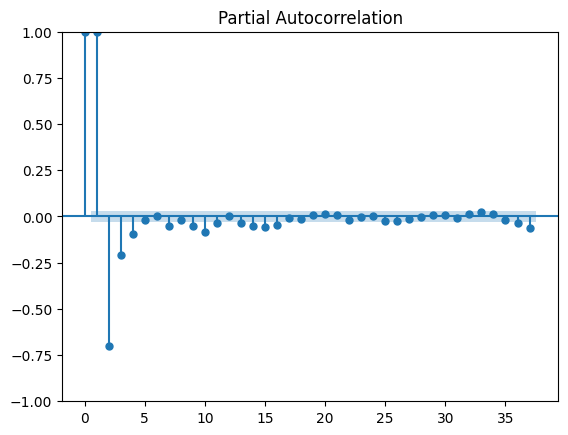

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['PowerConsumption_Zone1'])
plot_pacf(df['PowerConsumption_Zone1'])
plt.plot()

In [12]:
# combos
import itertools

p = d = q = range(0,2)
params = list(
    itertools.product(p,d,q)
)
params

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [13]:
seasonal_params = [
    (p,d,q,12) for (p,d,q) in params
]
seasonal_params

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

### Training and Testing Models of All Combinations

In [14]:
y = df.iloc[4000:]
y.head()

,PowerConsumption_Zone1
Datetime,
2017-01-28 18:40:00,42871.89873
2017-01-28 18:50:00,43163.54430
2017-01-28 19:00:00,42969.11392
2017-01-28 19:10:00,43139.24051
2017-01-28 19:20:00,42926.58228


In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
results = []
for param in params:
    for seasonal_param in seasonal_params:
        model = ARIMA(
            df['PowerConsumption_Zone1'],
            order=param,
            seasonal_order=seasonal_param
        )
        f = model.fit()

        y_pred = f.predict(start=4001, end=5000)
        mae = mean_absolute_error(y, y_pred)
        mse = mean_squared_error(y,y_pred)

        aic = f.aic
        bic = f.bic
        hqic = f.hqic
        
        results.append(
            (param, seasonal_param, f, aic, bic, hqic, mae, mse)
        )


In [17]:
len(results)

64

In [61]:
result_info = pd.DataFrame(results)
result_info.drop(2,axis=1,inplace=True)
result_info.columns = ['parameters', 'seasonal parameters', 'aic', 'bic', 'hqic', 'mae', 'mse']
result_info

,parameters,seasonal parameters,aic,bic,hqic,mae,mse
0,"(0, 0, 0)","(0, 0, 0, 12)",140768.184900,140781.219286,140772.753247,5917.404741,4.782408e+07
1,"(0, 0, 0)","(0, 0, 1, 12)",100554.714798,100574.266378,100561.567319,3941.587258,2.263469e+07
2,"(0, 0, 0)","(0, 1, 0, 12)",99581.288810,99587.803600,99583.572419,3638.798798,2.249700e+07
3,"(0, 0, 0)","(0, 1, 1, 12)",98782.942216,98795.971797,98787.509435,3215.124559,1.896287e+07
4,"(0, 0, 0)","(1, 0, 0, 12)",99143.510465,99163.062045,99150.362986,3544.236507,1.975829e+07
...,...,...,...,...,...,...,...
59,"(1, 1, 1)","(0, 1, 1, 12)",74974.592075,75000.650434,74983.726324,300.951832,1.735600e+05
60,"(1, 1, 1)","(1, 0, 0, 12)",75144.883709,75170.951681,75154.020215,288.845231,1.610239e+05
61,"(1, 1, 1)","(1, 0, 1, 12)",75146.867194,75179.452160,75158.287828,288.889304,1.610781e+05
62,"(1, 1, 1)","(1, 1, 0, 12)",76940.708811,76966.767170,76949.843060,379.715155,2.459534e+05


### Choosing the best model using `aic` criterion

In [31]:
# lets use aic as param
best_result = min(
    results, 
    key = lambda x: x[3]
)

print("Best Result")
best_result

Best Result


((1, 1, 1),
 (1, 1, 1, 12),
 74962.32855223285,
 74994.90150126058,
 74973.7463636308,
 303.89651553043535,
 176608.20714784224)

In [32]:
best_model = best_result[2]
best_model

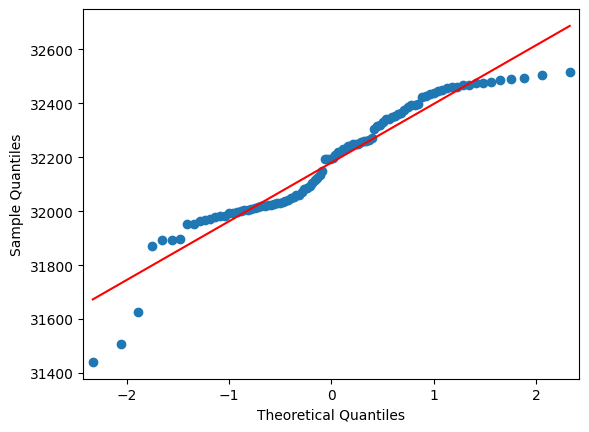

In [33]:
from statsmodels.api import qqplot

g=qqplot(best_model.forecast(100), line='s')

## Forecasting using the best model

Text(0.5, 1.0, 'Forecast of Power Consumption in Zone 1')

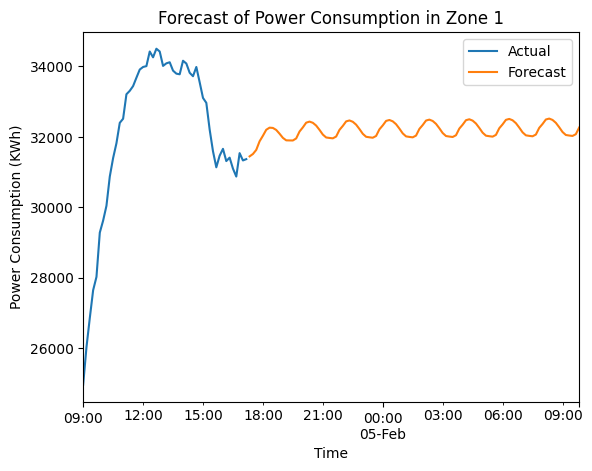

In [45]:
df['PowerConsumption_Zone1'].iloc[4950:].plot(label='Actual')
best_model.forecast(100).plot(label="Forecast")
plt.legend()
plt.xlabel('Time')
plt.ylabel('Power Consumption (KWh)')
plt.title('Forecast of Power Consumption in Zone 1')

In [ ]:
# completed successfully 